In [36]:
import akshare as ak
import pandas as pd
import numpy as np
from socks import method

In [38]:
WATCH_CODES = [("东方财富", 300059), ("中国人保", 601319), ("汇川技术", 300124), ("贵州茅台", 600519), ("捷昌驱动", 603583)]

In [39]:
stock_pinan = ak.stock_zh_a_hist(symbol="300059", period="daily", start_date="20200301", end_date='20250112', adjust="")["收盘"]

<Axes: >

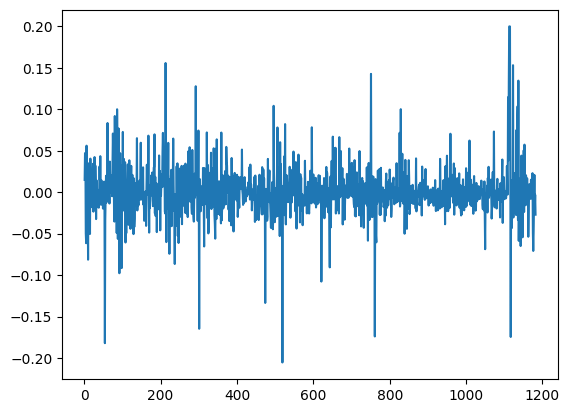

In [40]:
(stock_pinan/stock_pinan.shift(1)-1).plot()

<Axes: >

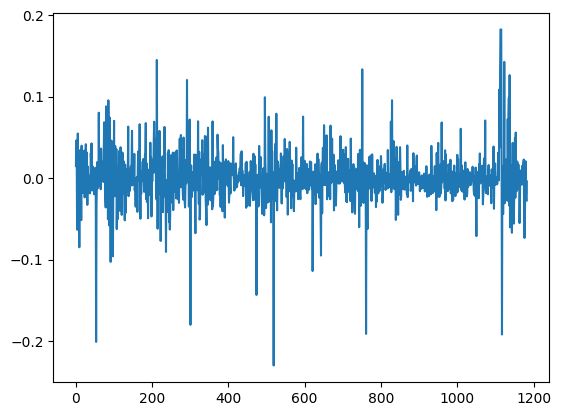

In [41]:
# 连续收益率
np.log(stock_pinan/stock_pinan.shift(1)).plot()

In [42]:
stock_pinan = stock_pinan.fillna(method="ffill")
(stock_pinan[7]/stock_pinan[0]-1)**(1/7)

C:\Users\51560\AppData\Local\Temp\ipykernel_8920\413663215.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_pinan = stock_pinan.fillna(method="ffill")
C:\Users\51560\AppData\Local\Temp\ipykernel_8920\413663215.py:2: RuntimeWarning: invalid value encountered in scalar power
  (stock_pinan[7]/stock_pinan[0]-1)**(1/7)


np.float64(nan)

In [43]:
(stock_pinan[7]/stock_pinan[0])

np.float64(0.9994499449944996)

In [44]:
stock_pinan[0:7]

0    18.18
1    18.45
2    19.32
3    20.17
4    19.17
5    17.99
6    19.00
Name: 收盘, dtype: float64

In [45]:
(stock_pinan[7]/stock_pinan[0])**(1/7)-1

np.float64(-7.859781692298728e-05)

In [46]:
((stock_pinan[7]/stock_pinan[0])**(1/7)-1)*244

np.float64(-0.019177867329208897)

<Axes: >

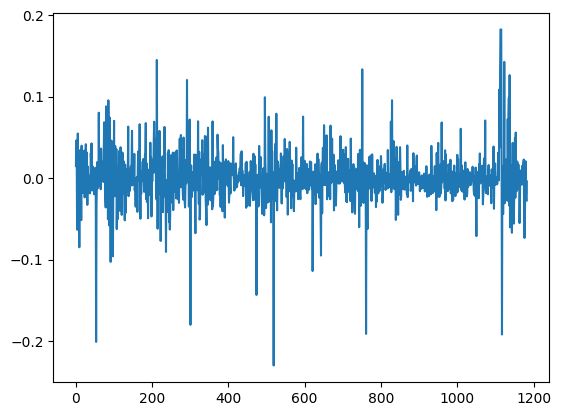

In [47]:
np.log(stock_pinan/stock_pinan.shift(1)).plot()

<Axes: >

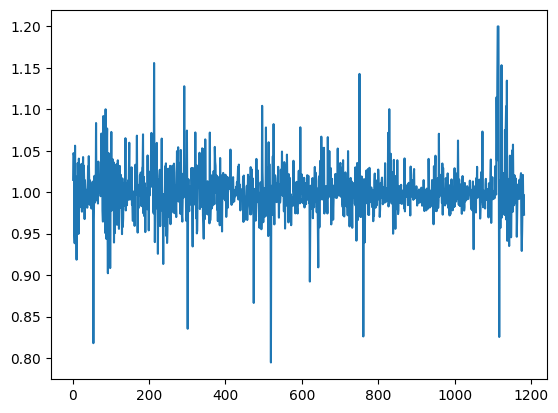

In [48]:
(stock_pinan/stock_pinan.shift(1)).plot()

In [49]:
WATCH_CODES

[('东方财富', 300059),
 ('中国人保', 601319),
 ('汇川技术', 300124),
 ('贵州茅台', 600519),
 ('捷昌驱动', 603583)]

In [50]:
p = ak.stock_zh_a_hist("300059", period="daily", start_date="20200301", end_date='20250131', adjust="hfq")
p.set_index("日期", inplace=True)
p

,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
日期,,,,,,,,,,,
2020-03-02,300059,673.90,688.58,702.87,661.87,4604523,8.301296e+09,6.24,4.75,31.23,8.45
2020-03-03,300059,708.14,698.74,732.60,689.33,4298307,8.048508e+09,6.28,1.48,10.16,7.89
2020-03-04,300059,697.98,731.47,731.47,688.95,4199615,7.863390e+09,6.09,4.68,32.73,7.71
2020-03-05,300059,737.11,763.45,782.64,717.17,6029906,1.192476e+10,8.95,4.37,31.98,11.07
2020-03-06,300059,742.00,725.83,750.66,725.45,3577783,6.953360e+09,3.30,-4.93,-37.62,6.57
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-06,300059,1782.81,1778.91,1814.79,1767.98,4233747,9.592895e+09,2.59,-1.38,-24.96,3.17
2025-01-07,300059,1785.15,1815.57,1818.69,1768.76,4215494,9.589671e+09,2.81,2.06,36.66,3.16
2025-01-08,300059,1798.41,1780.47,1818.69,1733.66,5778178,1.297713e+10,4.68,-1.93,-35.10,4.33


In [51]:
ps = p["收盘"]
ps

日期
2020-03-02     688.58
2020-03-03     698.74
2020-03-04     731.47
2020-03-05     763.45
2020-03-06     725.83
               ...   
2025-01-06    1778.91
2025-01-07    1815.57
2025-01-08    1780.47
2025-01-09    1775.01
2025-01-10    1727.42
Name: 收盘, Length: 1183, dtype: float64

In [52]:
for n,i in WATCH_CODES[1:]:
    p_i = ak.stock_zh_a_hist(str(i), period="daily", start_date="20200301", end_date='20241231', adjust="hfq")[["日期", "收盘"]]
    p_i.set_index("日期", inplace=True)
    ps = pd.concat([ps, p_i], axis=1)

ps.ffill(inplace=True)

In [53]:
ps

,收盘,收盘,收盘,收盘,收盘
日期,,,,,
2020-03-02,688.58,7.06,444.71,5759.89,71.89
2020-03-03,698.74,7.07,456.34,5895.51,73.09
2020-03-04,731.47,7.10,462.08,5975.51,72.60
2020-03-05,763.45,7.39,453.76,6186.95,73.89
2020-03-06,725.83,7.18,454.91,6109.07,72.54
...,...,...,...,...,...
2025-01-06,1778.91,8.42,1319.38,8863.55,74.61
2025-01-07,1815.57,8.42,1319.38,8863.55,74.61
2025-01-08,1780.47,8.42,1319.38,8863.55,74.61


In [54]:
ps.columns = [code[0] for code in WATCH_CODES]
ps

,东方财富,中国人保,汇川技术,贵州茅台,捷昌驱动
日期,,,,,
2020-03-02,688.58,7.06,444.71,5759.89,71.89
2020-03-03,698.74,7.07,456.34,5895.51,73.09
2020-03-04,731.47,7.10,462.08,5975.51,72.60
2020-03-05,763.45,7.39,453.76,6186.95,73.89
2020-03-06,725.83,7.18,454.91,6109.07,72.54
...,...,...,...,...,...
2025-01-06,1778.91,8.42,1319.38,8863.55,74.61
2025-01-07,1815.57,8.42,1319.38,8863.55,74.61
2025-01-08,1780.47,8.42,1319.38,8863.55,74.61


In [55]:
(ps/ps.shift(1))-1

,东方财富,中国人保,汇川技术,贵州茅台,捷昌驱动
日期,,,,,
2020-03-02,NaN,NaN,NaN,NaN,NaN
2020-03-03,0.014755,0.001416,0.026152,0.023546,0.016692
2020-03-04,0.046841,0.004243,0.012578,0.013570,-0.006704
2020-03-05,0.043720,0.040845,-0.018006,0.035384,0.017769
2020-03-06,-0.049276,-0.028417,0.002534,-0.012588,-0.018270
...,...,...,...,...,...
2025-01-06,-0.013837,0.000000,0.000000,0.000000,0.000000
2025-01-07,0.020608,0.000000,0.000000,0.000000,0.000000
2025-01-08,-0.019333,0.000000,0.000000,0.000000,0.000000


In [56]:
r=((ps/ps.shift(1))-1).dropna()

In [57]:
r_log = np.log(ps/ps.shift(1)).dropna()

In [58]:
r

,东方财富,中国人保,汇川技术,贵州茅台,捷昌驱动
日期,,,,,
2020-03-03,0.014755,0.001416,0.026152,0.023546,0.016692
2020-03-04,0.046841,0.004243,0.012578,0.013570,-0.006704
2020-03-05,0.043720,0.040845,-0.018006,0.035384,0.017769
2020-03-06,-0.049276,-0.028417,0.002534,-0.012588,-0.018270
2020-03-09,-0.061171,-0.033426,-0.036601,-0.034126,-0.076923
...,...,...,...,...,...
2025-01-06,-0.013837,0.000000,0.000000,0.000000,0.000000
2025-01-07,0.020608,0.000000,0.000000,0.000000,0.000000
2025-01-08,-0.019333,0.000000,0.000000,0.000000,0.000000


In [59]:
r_log

,东方财富,中国人保,汇川技术,贵州茅台,捷昌驱动
日期,,,,,
2020-03-03,0.014647,0.001415,0.025816,0.023273,0.016554
2020-03-04,0.045777,0.004234,0.012500,0.013478,-0.006727
2020-03-05,0.042791,0.040033,-0.018170,0.034773,0.017613
2020-03-06,-0.050532,-0.028828,0.002531,-0.012668,-0.018439
2020-03-09,-0.063122,-0.033998,-0.037287,-0.034722,-0.080043
...,...,...,...,...,...
2025-01-06,-0.013934,0.000000,0.000000,0.000000,0.000000
2025-01-07,0.020399,0.000000,0.000000,0.000000,0.000000
2025-01-08,-0.019522,0.000000,0.000000,0.000000,0.000000


In [60]:
w1 = np.array([0.2,0.2,0.2,0.3,0.1])

In [61]:
r_n=np.dot(r,w1)

In [62]:
r_n

array([ 0.01719756,  0.0161331 ,  0.02570413, ..., -0.00386655,
       -0.00061332, -0.00536222], shape=(1182,))

In [63]:
ps.tail(1)

,东方财富,中国人保,汇川技术,贵州茅台,捷昌驱动
日期,,,,,
2025-01-10,1727.42,8.42,1319.38,8863.55,74.61


In [64]:
(ps.tail(1).values/ps.head(1).values)-1

array([[1.50867002, 0.19263456, 1.96683232, 0.53884015, 0.03783558]])

In [65]:
np.dot(((ps.tail(1).values/ps.head(1).values)-1), w1)
#组合收益率

array([0.89906298])

In [66]:
r_log.sum()

东方财富    0.919753
中国人保    0.176165
汇川技术    1.087495
贵州茅台    0.431029
捷昌驱动    0.037137
dtype: float64

In [67]:
r.sum()

东方财富    1.438840
中国人保    0.313419
汇川技术    1.488938
贵州茅台    0.607647
捷昌驱动    0.505444
dtype: float64

In [68]:
p

,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
日期,,,,,,,,,,,
2020-03-02,300059,673.90,688.58,702.87,661.87,4604523,8.301296e+09,6.24,4.75,31.23,8.45
2020-03-03,300059,708.14,698.74,732.60,689.33,4298307,8.048508e+09,6.28,1.48,10.16,7.89
2020-03-04,300059,697.98,731.47,731.47,688.95,4199615,7.863390e+09,6.09,4.68,32.73,7.71
2020-03-05,300059,737.11,763.45,782.64,717.17,6029906,1.192476e+10,8.95,4.37,31.98,11.07
2020-03-06,300059,742.00,725.83,750.66,725.45,3577783,6.953360e+09,3.30,-4.93,-37.62,6.57
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-06,300059,1782.81,1778.91,1814.79,1767.98,4233747,9.592895e+09,2.59,-1.38,-24.96,3.17
2025-01-07,300059,1785.15,1815.57,1818.69,1768.76,4215494,9.589671e+09,2.81,2.06,36.66,3.16
2025-01-08,300059,1798.41,1780.47,1818.69,1733.66,5778178,1.297713e+10,4.68,-1.93,-35.10,4.33


In [69]:
ps

,东方财富,中国人保,汇川技术,贵州茅台,捷昌驱动
日期,,,,,
2020-03-02,688.58,7.06,444.71,5759.89,71.89
2020-03-03,698.74,7.07,456.34,5895.51,73.09
2020-03-04,731.47,7.10,462.08,5975.51,72.60
2020-03-05,763.45,7.39,453.76,6186.95,73.89
2020-03-06,725.83,7.18,454.91,6109.07,72.54
...,...,...,...,...,...
2025-01-06,1778.91,8.42,1319.38,8863.55,74.61
2025-01-07,1815.57,8.42,1319.38,8863.55,74.61
2025-01-08,1780.47,8.42,1319.38,8863.55,74.61


In [70]:
# 组合投资风险 标准差
np.dot(r, w1).std()

np.float64(0.015932214869924848)

In [71]:
r.cov() #收益的协方差

,东方财富,中国人保,汇川技术,贵州茅台,捷昌驱动
东方财富,0.000897,0.000235,0.000356,0.000236,0.000272
中国人保,0.000235,0.000234,0.000100,0.000087,0.000073
汇川技术,0.000356,0.000100,0.000689,0.000165,0.000250
贵州茅台,0.000236,0.000087,0.000165,0.000300,0.000143
捷昌驱动,0.000272,0.000073,0.000250,0.000143,0.000800


In [72]:
for i in range(0,5):
    print(r.iloc[:,i].std())
# 组合投资风险值 比人保大，但是一般来说 组合投资的风险比单个股票是要小的

0.02994423463676862
0.015305236329631516
0.026244286889250998
0.017315193428406248
0.028278348359883635


In [73]:
weight_ram = np.random.random(len(WATCH_CODES))
weight_ram = weight_ram / np.sum(weight_ram)
weight_ram

array([0.17534748, 0.228651  , 0.09351535, 0.43442319, 0.06806298])

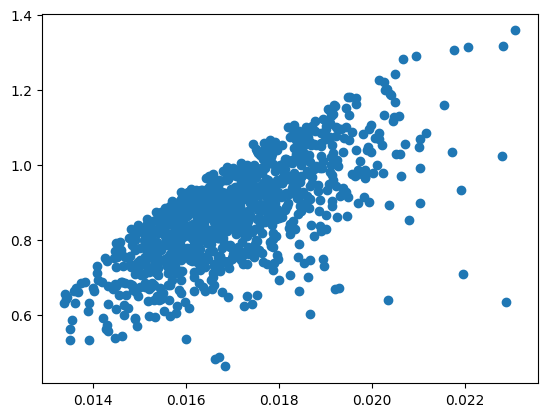

In [76]:
x = []
y = []
for i in range(1000):
    w0 = np.random.random(len(WATCH_CODES))
    w0 = w0 / np.sum(w0)
    r_n_0 = np.dot(r,w0)
    feng_xian = r_n_0.std()
    x.append(feng_xian)
    shou_yi = r_n_0.sum()
    y.append(shou_yi)
    
import matplotlib.pyplot as plt
plt.plot(x,y,"o")

In [77]:
ws = ''
for k,v in WATCH_CODES:
    ws += str(v) + ','
print(ws)

300059,601319,300124,600519,603583,


In [78]:
def sharp(w0):
    w0 = w0/np.sum(w0)
    r_n_0 = np.dot(r_log,w0)
    return r_n_0.std()/r_n_0.sum()

In [79]:
w0

array([0.2114653 , 0.09787669, 0.09064041, 0.36547083, 0.23454677])

In [80]:
sharp(w0)

np.float64(0.03459748519976746)

In [82]:
import scipy.optimize as sco

noa = len(WATCH_CODES)

cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},)

bnds = tuple((0,1) for i in range(noa))

opts = sco.minimize(sharp, noa*[1./noa,], method="SLSQP", bounds=bnds, constraints=cons)

opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.02245710934690387
       x: [ 1.940e-01  5.204e-18  5.965e-01  2.095e-01  0.000e+00]
     nit: 8
     jac: [-2.589e-04  2.106e-03 -2.876e-05  3.217e-04  1.120e-02]
    nfev: 48
    njev: 8

In [83]:
opts.x

array([1.94049560e-01, 5.20417043e-18, 5.96477277e-01, 2.09473163e-01,
       0.00000000e+00])

In [84]:
w0=opts.x

In [85]:
w0=w0/np.sum(w0)
r_n_0 = np.dot(r_log,w0)
print(r_n_0.std(), r_n_0.sum())

0.020602883549953783 0.9174325703140539


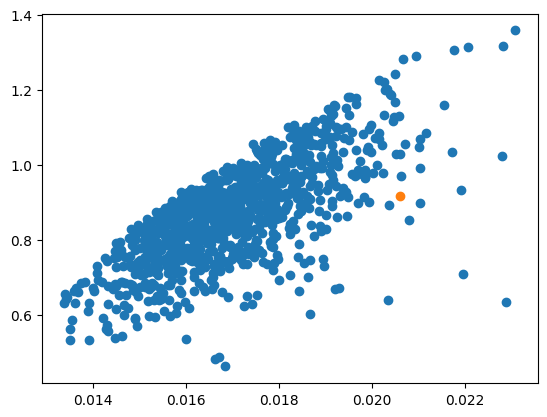

In [87]:
plt.plot(x, y, "o")
plt.plot(r_n_0.std(), r_n_0.sum(), "o")

In [100]:
index_zh = ak.index_zh_a_hist(symbol="000902", 
                              period="daily",
                              start_date="20200301",
                              end_date="20250301")[["日期","收盘"]]

In [119]:
index_zh.set_index("日期", inplace=True)
index_zh

,收盘
日期,
2020-03-02,4904.45
2020-03-03,4948.25
2020-03-04,4975.34
2020-03-05,5070.97
2020-03-06,5020.54
...,...
2025-01-06,4787.24
2025-01-07,4848.59
2025-01-08,4839.62


In [125]:
stock_pinan = ak.stock_zh_a_hist("000001", period="daily",start_date="20200301", end_date="20250301", adjust="")[["日期","收盘"]]
stock_pinan.set_index("日期", inplace=True)
stock_pinan.ffill(inplace=True)
stock_pinan

,收盘
日期,
2020-03-02,14.79
2020-03-03,14.72
2020-03-04,14.69
2020-03-05,15.39
2020-03-06,15.03
...,...
2025-01-06,11.44
2025-01-07,11.51
2025-01-08,11.50


In [126]:
zh_pinan=pd.merge(index_zh,stock_pinan,on='日期',how="left")

In [127]:
zh_pinan

,收盘_x,收盘_y
日期,,
2020-03-02,4904.45,NaN
2020-03-03,4948.25,NaN
2020-03-04,4975.34,NaN
2020-03-05,5070.97,NaN
2020-03-06,5020.54,NaN
...,...,...
2025-01-06,4787.24,NaN
2025-01-07,4848.59,NaN
2025-01-08,4839.62,NaN
